In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# seaborn visualisation style
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [3]:
#Load Dataset

train_fd001 = pd.read_csv('../data/train_FD001.txt', sep=" ", header=None)


In [6]:
train_fd001.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64

In [7]:
train_fd001.drop(columns=[26, 27], inplace=True)  # Drop unused columns


In [8]:
# Add column names for better readability
column_names = [
    'engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'
] + [f'sensor_{i}' for i in range(1, 22)]
train_fd001.columns = column_names

In [9]:
train_fd001.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
# Basic information about the dataset
print("\nDataset Information:")
train_fd001.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sens

In [11]:
# Summary statistics
print("\nSummary Statistics:")
display(train_fd001.describe())



Summary Statistics:


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [12]:
# Check for missing values
print("\nMissing Values:")
print(train_fd001.isnull().sum())



Missing Values:
engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


In [13]:
# Calculate Remaining Useful Life (RUL)
train_fd001['RUL'] = train_fd001.groupby('engine_id')['cycle'].transform(max) - train_fd001['cycle']

/tmp/ipykernel_55554/4246984081.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  train_fd001['RUL'] = train_fd001.groupby('engine_id')['cycle'].transform(max) - train_fd001['cycle']


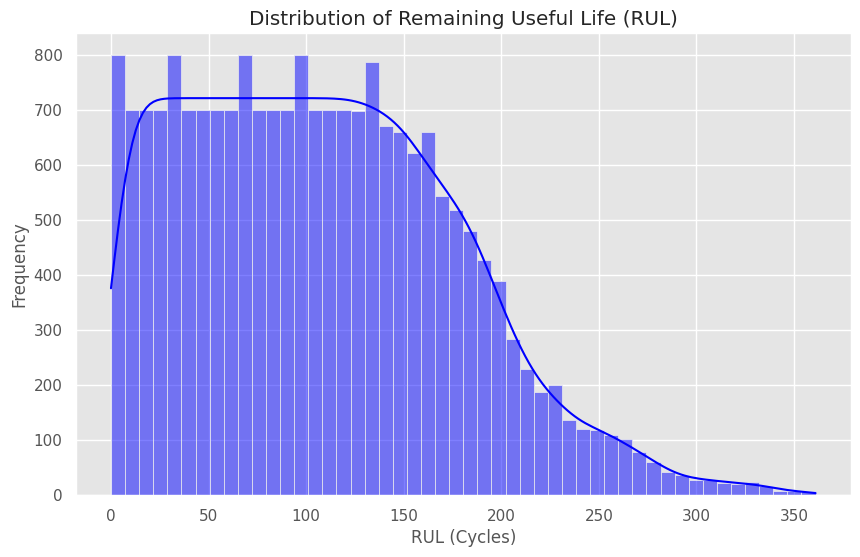

In [15]:
# Plot the distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(train_fd001['RUL'], bins=50, kde=True, color='blue')
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL (Cycles)')
plt.ylabel('Frequency')
plt.show()


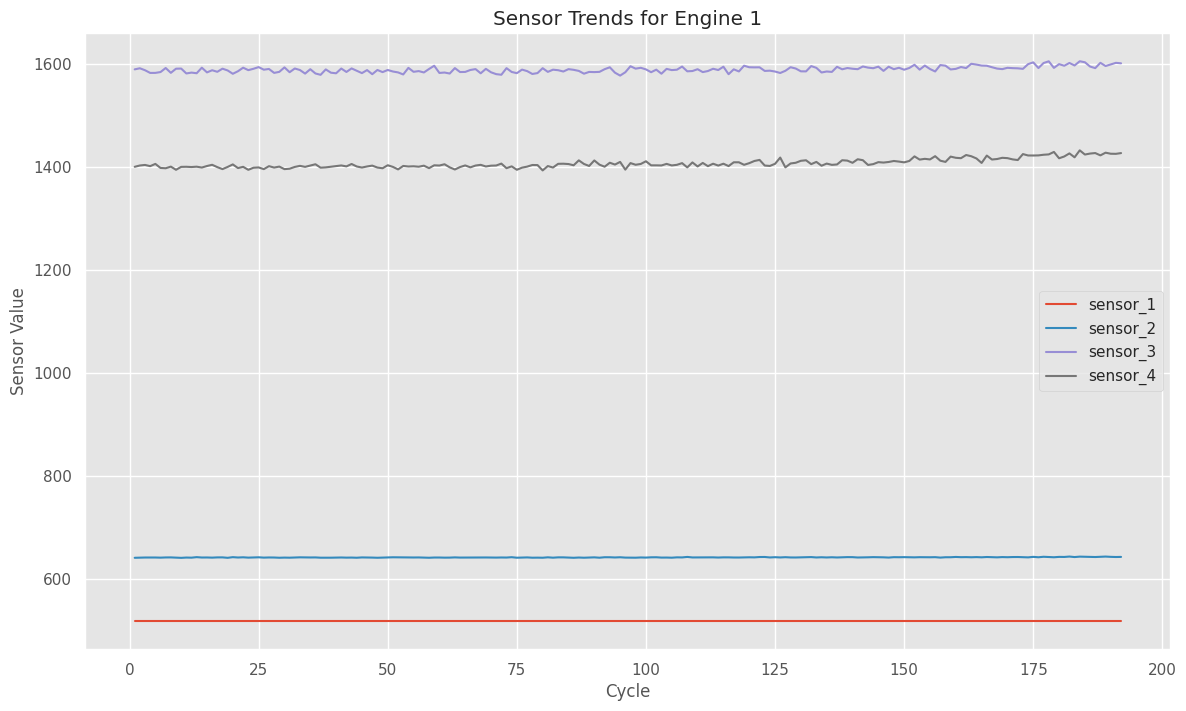

In [17]:
# Plot sensor trends for a single engine
engine_id = 1  # Choose an engine to visualize
engine_data = train_fd001[train_fd001['engine_id'] == engine_id]


plt.figure(figsize=(14, 8))
for sensor in ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4']:
    plt.plot(engine_data['cycle'], engine_data[sensor], label=sensor)
plt.title(f'Sensor Trends for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

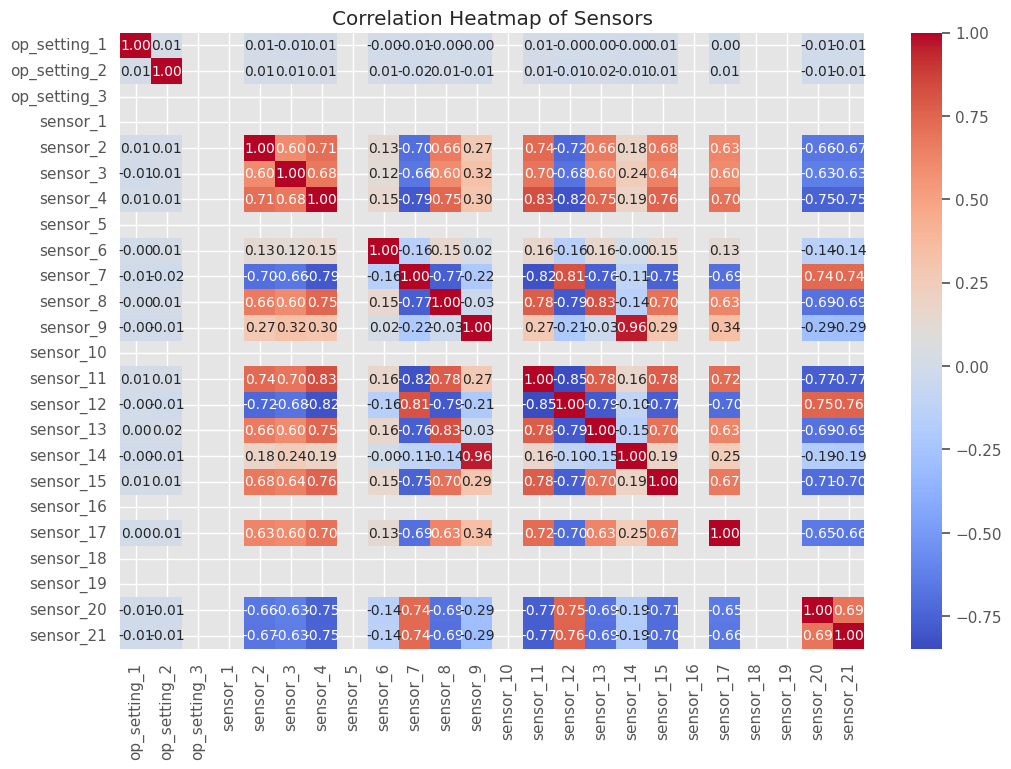

In [18]:
# Correlation heatmap of sensors
plt.figure(figsize=(12, 8))
corr_matrix = train_fd001.iloc[:, 2:26].corr()  # Correlation between sensors
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sensors')
plt.show()

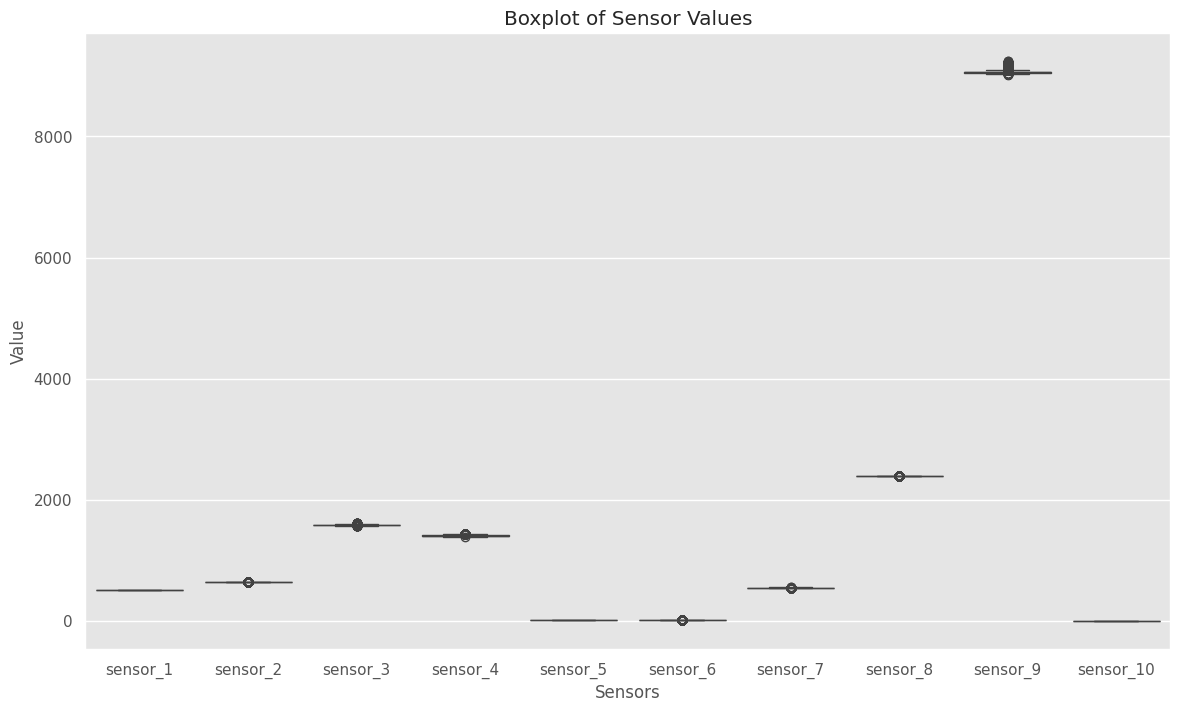

In [19]:
# Boxplot of sensor values
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_fd001.iloc[:, 5:15])  # Plot first 10 sensors
plt.title('Boxplot of Sensor Values')
plt.xlabel('Sensors')
plt.ylabel('Value')
plt.show()

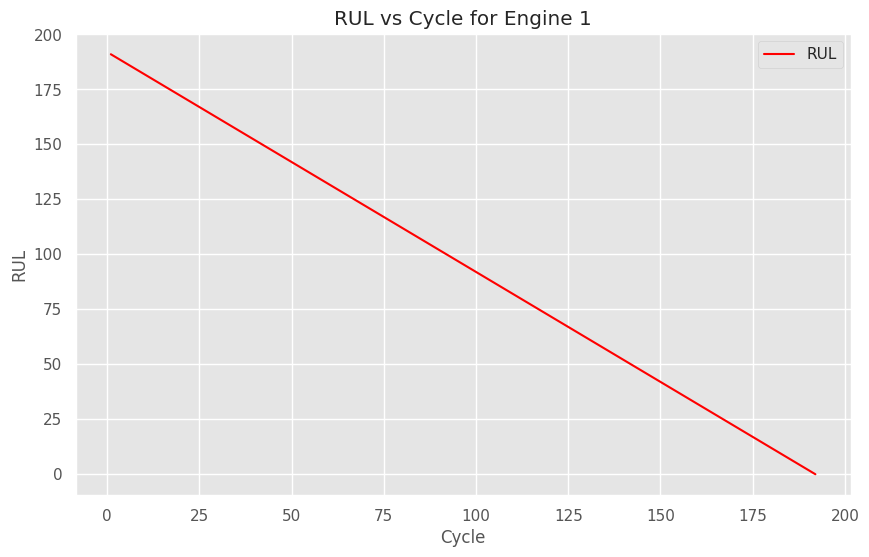

In [20]:
# RUL vs Cycle for a single engine
plt.figure(figsize=(10, 6))
plt.plot(engine_data['cycle'], engine_data['RUL'], label='RUL', color='red')
plt.title(f'RUL vs Cycle for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.legend()
plt.show()

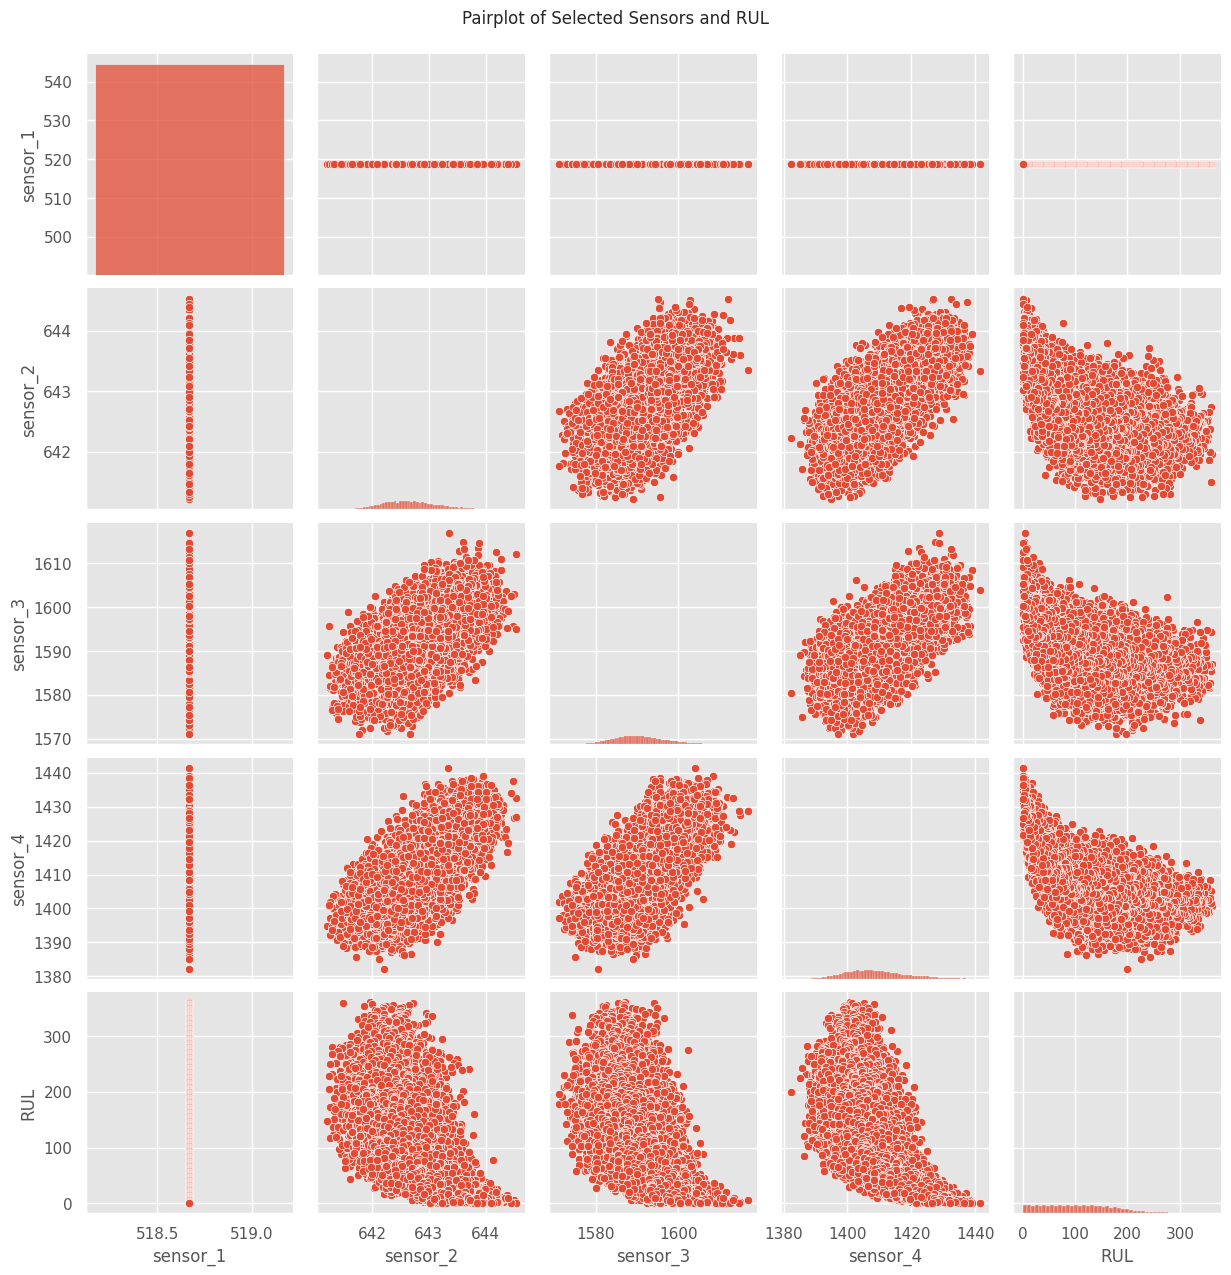

In [21]:
# Pairplot of selected sensors
sns.pairplot(train_fd001[['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'RUL']])
plt.suptitle('Pairplot of Selected Sensors and RUL', y=1.02)
plt.show()